In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels. api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from  pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [37]:
df = pd.read_csv('monthly_sales_data.csv')
df

,Month,Sales
0,2010-01-31,124.835708
1,2010-02-28,102.780795
2,2010-03-31,151.742552
3,2010-04-30,205.114078
4,2010-05-31,126.770228
...,...,...
295,2034-08-31,1030.571806
296,2034-09-30,1117.278365
297,2034-10-31,1094.380685
298,2034-11-30,1125.995827


In [3]:
df.info

<bound method DataFrame.info of           Month        Sales
0    2010-01-31   124.835708
1    2010-02-28   102.780795
2    2010-03-31   151.742552
3    2010-04-30   205.114078
4    2010-05-31   126.770228
..          ...          ...
295  2034-08-31  1030.571806
296  2034-09-30  1117.278365
297  2034-10-31  1094.380685
298  2034-11-30  1125.995827
299  2034-12-31  1122.775967

[300 rows x 2 columns]>

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.shape

(300, 2)

In [6]:
df.describe

<bound method NDFrame.describe of           Month        Sales
0    2010-01-31   124.835708
1    2010-02-28   102.780795
2    2010-03-31   151.742552
3    2010-04-30   205.114078
4    2010-05-31   126.770228
..          ...          ...
295  2034-08-31  1030.571806
296  2034-09-30  1117.278365
297  2034-10-31  1094.380685
298  2034-11-30  1125.995827
299  2034-12-31  1122.775967

[300 rows x 2 columns]>

In [7]:
pd.isnull(df['Sales'])

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: Sales, Length: 300, dtype: bool

In [8]:
pd.isnull(df['Month'])

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: Month, Length: 300, dtype: bool

In [9]:
df = df.dropna()

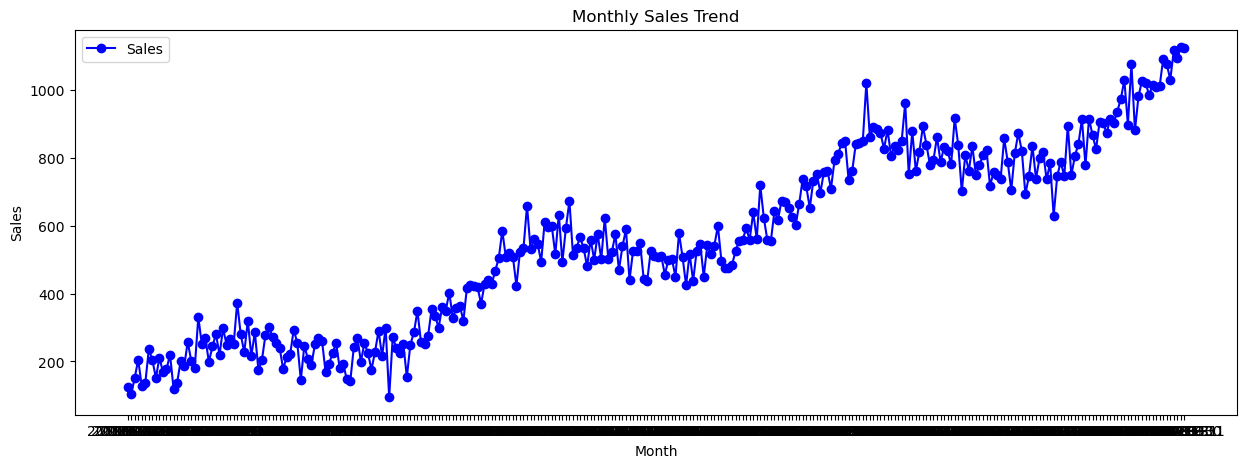

In [10]:
plt.figure(figsize=(15, 5))  # Optional: Set the figure size
plt.plot(df["Month"], df["Sales"], marker='o', color='b', label="Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.show()

In [11]:
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m") #SETTING MONTH AS INDEX AND CHANGING INTO DATETIME FORMAT

# Set the "Month" column as the index
df.set_index("Month", inplace=True)

# Now your DataFrame has the datetime index
print(df)

                  Sales
Month                  
2010-01-31   124.835708
2010-02-28   102.780795
2010-03-31   151.742552
2010-04-30   205.114078
2010-05-31   126.770228
...                 ...
2034-08-31  1030.571806
2034-09-30  1117.278365
2034-10-31  1094.380685
2034-11-30  1125.995827
2034-12-31  1122.775967

[300 rows x 1 columns]


In [12]:
missing_values = df.isnull() #CHECKING MISSING VALUES
print(missing_values)

            Sales
Month            
2010-01-31  False
2010-02-28  False
2010-03-31  False
2010-04-30  False
2010-05-31  False
...           ...
2034-08-31  False
2034-09-30  False
2034-10-31  False
2034-11-30  False
2034-12-31  False

[300 rows x 1 columns]


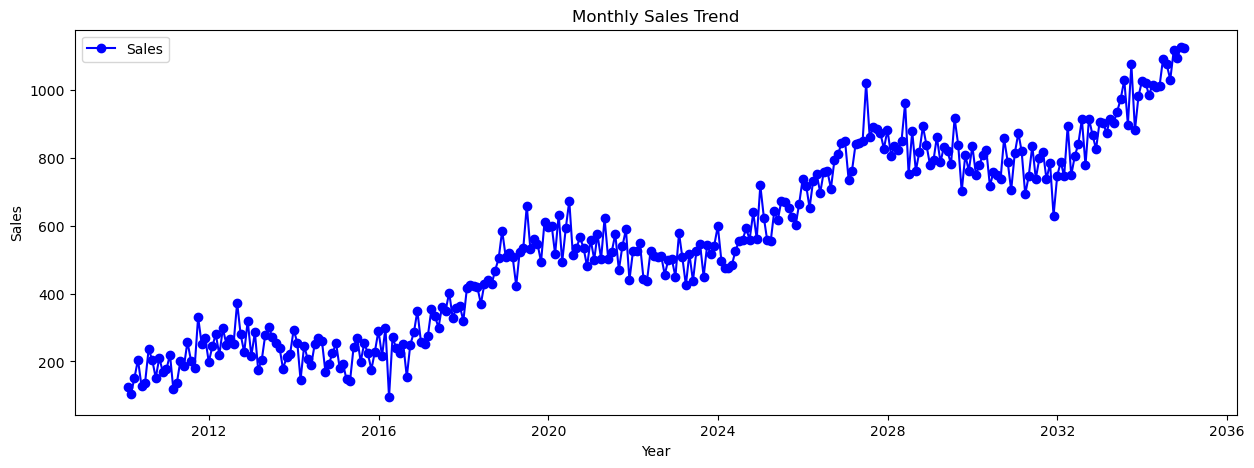

In [13]:
plt.figure(figsize=(15, 5))  # Optional: Set the figure size
plt.plot(df["Sales"], marker='o', color='b', label="Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.show()

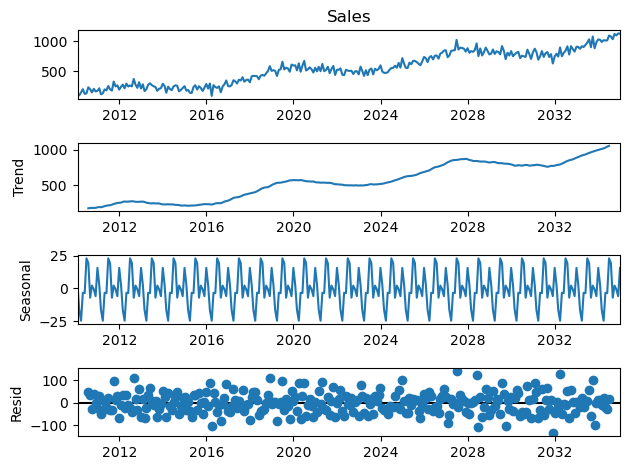

In [14]:
#Decomposing time series using additive model as we infer that relation might be linear
def plot_decomposition(df):
    result = seasonal_decompose(df['Sales'], model='additive')
    result.plot()
    plt.show()

# Call the function with your data
plot_decomposition(df)

In [38]:
#Considering the period till September 2024
reduced_df = df[:177]  # Keeps every 10th row
reduced_df


,Month,Sales
0,2010-01-31,124.835708
1,2010-02-28,102.780795
2,2010-03-31,151.742552
3,2010-04-30,205.114078
4,2010-05-31,126.770228
...,...,...
172,2024-05-31,526.569011
173,2024-06-30,553.946671
174,2024-07-31,557.563598
175,2024-08-31,592.286085


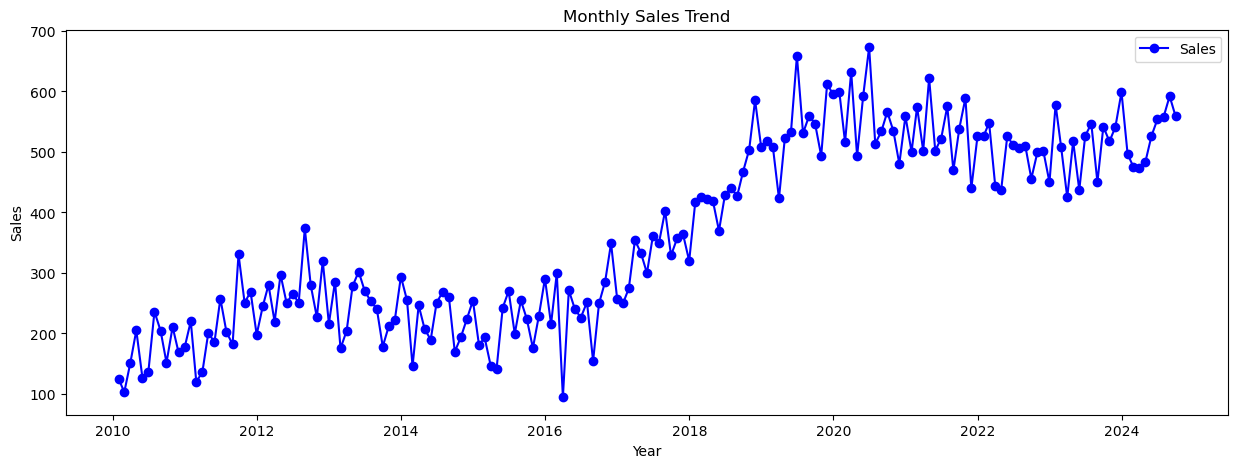

In [16]:
plt.figure(figsize=(15, 5))  # Optional: Set the figure size
plt.plot(reduced_df["Sales"], marker='o', color='b', label="Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.show()

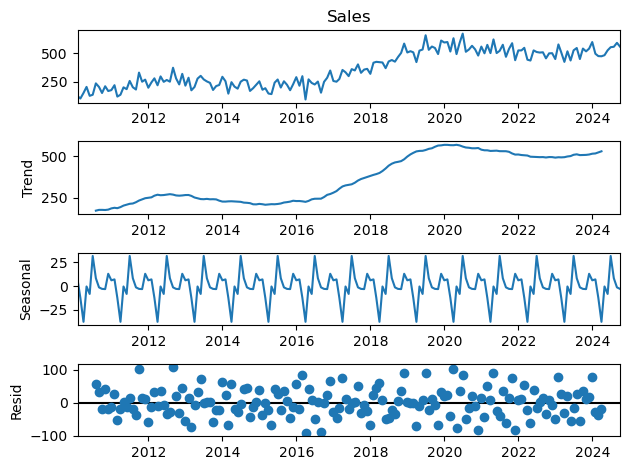

In [17]:
def plot_decomposition(reduced_df):
    result = seasonal_decompose(reduced_df['Sales'], model='additive')
    result.plot()
    plt.show()

# Call the function with your data
plot_decomposition(reduced_df)

In [18]:
reduced_df.info

<bound method DataFrame.info of                  Sales
Month                 
2010-01-31  124.835708
2010-02-28  102.780795
2010-03-31  151.742552
2010-04-30  205.114078
2010-05-31  126.770228
...                ...
2024-05-31  526.569011
2024-06-30  553.946671
2024-07-31  557.563598
2024-08-31  592.286085
2024-09-30  559.114031

[177 rows x 1 columns]>

In [19]:
reduced_df.describe

<bound method NDFrame.describe of                  Sales
Month                 
2010-01-31  124.835708
2010-02-28  102.780795
2010-03-31  151.742552
2010-04-30  205.114078
2010-05-31  126.770228
...                ...
2024-05-31  526.569011
2024-06-30  553.946671
2024-07-31  557.563598
2024-08-31  592.286085
2024-09-30  559.114031

[177 rows x 1 columns]>

In [20]:
from statsmodels.tsa.stattools import adfuller
def adf_test(reduced_df):
    #perform dickey-fuller test
    print('Result of Dickey Fuller Test: ')
    dftest = adfuller(reduced_df, autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'% key] = value
    print(dfoutput)

In [21]:
def plot_time_series(reduced_df):
    plt.plot(reduced_df)
    plt.title('Time Series Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

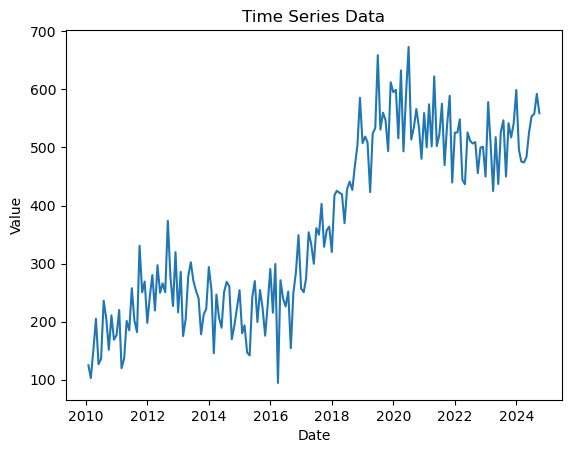

Result of Dickey Fuller Test: 
Test Statistic                  -0.689528
p-value                          0.849443
#Lags Used                       6.000000
Number of Observations Used    170.000000
Critical Value(1%)              -3.469413
Critical Value(5%)              -2.878696
Critical Value(10%)             -2.575917
dtype: float64


In [22]:
plot_time_series(reduced_df)
adf_test(reduced_df)

In [39]:
reduced_df['Difference'] = reduced_df['Sales'].diff(periods=1)

C:\Users\anike\AppData\Local\Temp\ipykernel_12428\1385919059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Difference'] = reduced_df['Sales'].diff(periods=1)


In [24]:
reduced_df['Difference']

Month
2010-01-31          NaN
2010-02-28   -22.054913
2010-03-31    48.961757
2010-04-30    53.371526
2010-05-31   -78.343851
                ...    
2024-05-31    43.009944
2024-06-30    27.377661
2024-07-31     3.616927
2024-08-31    34.722487
2024-09-30   -33.172054
Name: Difference, Length: 177, dtype: float64

In [25]:
# Assuming your DataFrame is named 'df'
reduced_df.drop(index=reduced_df.index[0], inplace=True)
reduced_df

C:\Users\anike\AppData\Local\Temp\ipykernel_12428\4162020079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(index=reduced_df.index[0], inplace=True)


,Sales,Difference
Month,,
2010-02-28,102.780795,-22.054913
2010-03-31,151.742552,48.961757
2010-04-30,205.114078,53.371526
2010-05-31,126.770228,-78.343851
2010-06-30,136.168115,9.397888
...,...,...
2024-05-31,526.569011,43.009944
2024-06-30,553.946671,27.377661
2024-07-31,557.563598,3.616927


In [26]:
reduced_df.drop('Sales', axis=1, inplace=True)
reduced_df

C:\Users\anike\AppData\Local\Temp\ipykernel_12428\2979756795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop('Sales', axis=1, inplace=True)


,Difference
Month,
2010-02-28,-22.054913
2010-03-31,48.961757
2010-04-30,53.371526
2010-05-31,-78.343851
2010-06-30,9.397888
...,...
2024-05-31,43.009944
2024-06-30,27.377661
2024-07-31,3.616927


In [27]:
def adf_test(reduced_df):
    #perform dickey-fuller test
    print('Result of Dickey Fuller Test: ')
    dftest = adfuller(reduced_df, autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'% key] = value
    print(dfoutput)
    
adf_test(reduced_df)

Result of Dickey Fuller Test: 
Test Statistic                -8.687990e+00
p-value                        4.113341e-14
#Lags Used                     5.000000e+00
Number of Observations Used    1.700000e+02
Critical Value(1%)            -3.469413e+00
Critical Value(5%)            -2.878696e+00
Critical Value(10%)           -2.575917e+00
dtype: float64


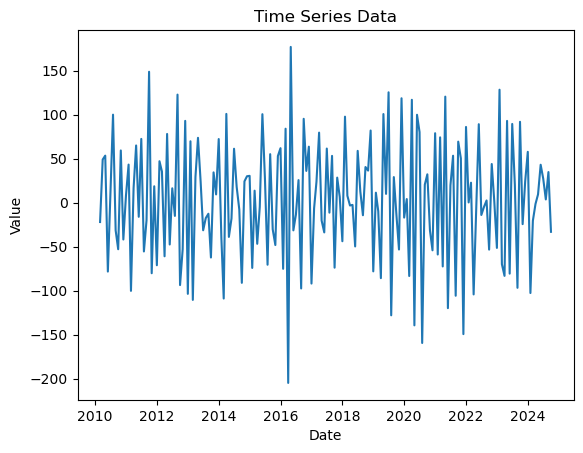

In [28]:
def plot_time_series(reduced_df):
    plt.plot(reduced_df)
    plt.title('Time Series Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

plot_time_series(reduced_df)

In [29]:
df

,Sales
Month,
2010-01-31,124.835708
2010-02-28,102.780795
2010-03-31,151.742552
2010-04-30,205.114078
2010-05-31,126.770228
...,...
2034-08-31,1030.571806
2034-09-30,1117.278365
2034-10-31,1094.380685


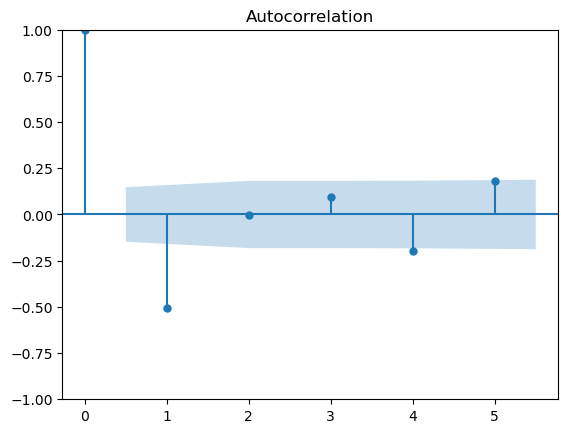

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
acf = plot_acf(reduced_df, lags = 5)

C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


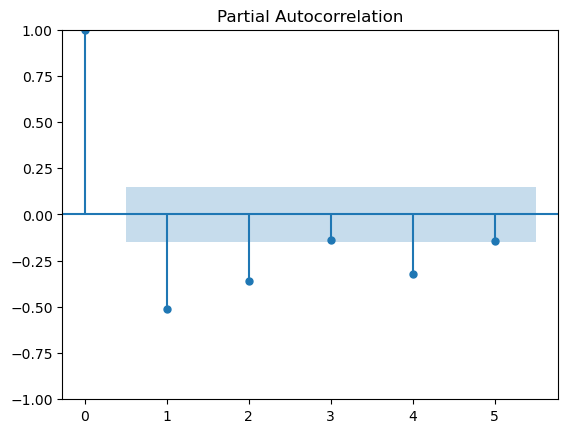

In [31]:
pacf = plot_pacf(reduced_df['Difference'], lags = 5)

In [32]:
reduced_df

,Difference
Month,
2010-02-28,-22.054913
2010-03-31,48.961757
2010-04-30,53.371526
2010-05-31,-78.343851
2010-06-30,9.397888
...,...
2024-05-31,43.009944
2024-06-30,27.377661
2024-07-31,3.616927


In [40]:
reduced_df["Lag_2_return"]=reduced_df['Difference'].shift(1) #Generating lag values(1,1) to compare with residuals
reduced_df

C:\Users\anike\AppData\Local\Temp\ipykernel_12428\4052910368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["Lag_2_return"]=reduced_df['Difference'].shift(1) #Generating lag values(1,1) to compare with residuals


,Month,Sales,Difference,Lag_2_return
0,2010-01-31,124.835708,NaN,NaN
1,2010-02-28,102.780795,-22.054913,NaN
2,2010-03-31,151.742552,48.961757,-22.054913
3,2010-04-30,205.114078,53.371526,48.961757
4,2010-05-31,126.770228,-78.343851,53.371526
...,...,...,...,...
172,2024-05-31,526.569011,43.009944,9.355555
173,2024-06-30,553.946671,27.377661,43.009944
174,2024-07-31,557.563598,3.616927,27.377661
175,2024-08-31,592.286085,34.722487,3.616927


In [34]:
reduced_df.drop('Difference', axis=1, inplace=True) #Removing difference column
reduced_df.drop(index=reduced_df.index[0], inplace=True) #removing first row
reduced_df

C:\Users\anike\AppData\Local\Temp\ipykernel_12428\1792153814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop('Difference', axis=1, inplace=True) #Removing difference column
C:\Users\anike\AppData\Local\Temp\ipykernel_12428\1792153814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(index=reduced_df.index[0], inplace=True) #removing first row


,Lag_2_return
Month,
2010-03-31,-22.054913
2010-04-30,48.961757
2010-05-31,53.371526
2010-06-30,-78.343851
2010-07-31,9.397888
...,...
2024-05-31,9.355555
2024-06-30,43.009944
2024-07-31,27.377661


C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


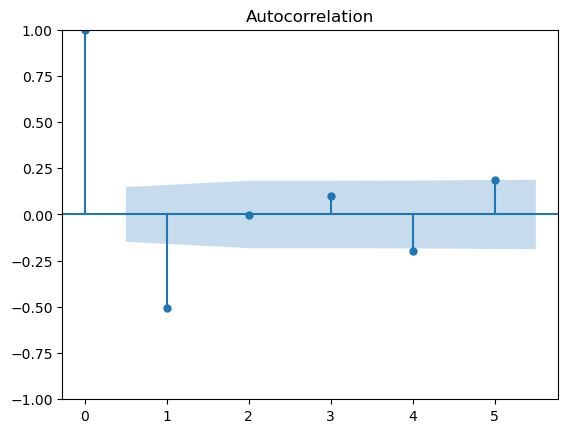

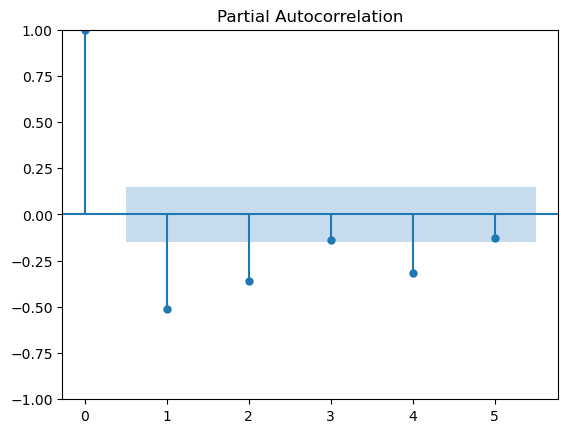

In [36]:
acf = plot_acf(reduced_df, lags = 5)
pacf = plot_pacf(reduced_df['Lag_2_return'], lags = 5)

In [41]:
reduced_df

,Month,Sales,Difference,Lag_2_return
0,2010-01-31,124.835708,NaN,NaN
1,2010-02-28,102.780795,-22.054913,NaN
2,2010-03-31,151.742552,48.961757,-22.054913
3,2010-04-30,205.114078,53.371526,48.961757
4,2010-05-31,126.770228,-78.343851,53.371526
...,...,...,...,...
172,2024-05-31,526.569011,43.009944,9.355555
173,2024-06-30,553.946671,27.377661,43.009944
174,2024-07-31,557.563598,3.616927,27.377661
175,2024-08-31,592.286085,34.722487,3.616927


In [42]:
reduced_df["Month"] = pd.to_datetime(reduced_df["Month"], format="%Y-%m") #SETTING MONTH AS INDEX AND CHANGING INTO DATETIME FORMAT

# Set the "Month" column as the index
reduced_df.set_index("Month", inplace=True)

# Now your DataFrame has the datetime index
print(reduced_df)

                 Sales  Difference  Lag_2_return
Month                                           
2010-01-31  124.835708         NaN           NaN
2010-02-28  102.780795  -22.054913           NaN
2010-03-31  151.742552   48.961757    -22.054913
2010-04-30  205.114078   53.371526     48.961757
2010-05-31  126.770228  -78.343851     53.371526
...                ...         ...           ...
2024-05-31  526.569011   43.009944      9.355555
2024-06-30  553.946671   27.377661     43.009944
2024-07-31  557.563598    3.616927     27.377661
2024-08-31  592.286085   34.722487      3.616927
2024-09-30  559.114031  -33.172054     34.722487

[177 rows x 3 columns]


C:\Users\anike\AppData\Local\Temp\ipykernel_12428\1380113241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["Month"] = pd.to_datetime(reduced_df["Month"], format="%Y-%m") #SETTING MONTH AS INDEX AND CHANGING INTO DATETIME FORMAT


In [44]:
#Removing NaN Values
reduced_df.drop(index=reduced_df.index[0], inplace=True)
reduced_df

C:\Users\anike\AppData\Local\Temp\ipykernel_12428\3358965040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(index=reduced_df.index[0], inplace=True)


,Sales,Difference,Lag_2_return
Month,,,
2010-03-31,151.742552,48.961757,-22.054913
2010-04-30,205.114078,53.371526,48.961757
2010-05-31,126.770228,-78.343851,53.371526
2010-06-30,136.168115,9.397888,-78.343851
2010-07-31,236.085860,99.917745,9.397888
...,...,...,...
2024-05-31,526.569011,43.009944,9.355555
2024-06-30,553.946671,27.377661,43.009944
2024-07-31,557.563598,3.616927,27.377661


In [45]:
reduced_df2 = reduced_df['Sales']
reduced_df2

Month
2010-03-31    151.742552
2010-04-30    205.114078
2010-05-31    126.770228
2010-06-30    136.168115
2010-07-31    236.085860
                 ...    
2024-05-31    526.569011
2024-06-30    553.946671
2024-07-31    557.563598
2024-08-31    592.286085
2024-09-30    559.114031
Name: Sales, Length: 175, dtype: float64

In [46]:
reduced_df3 = reduced_df['Lag_2_return']
reduced_df3

Month
2010-03-31   -22.054913
2010-04-30    48.961757
2010-05-31    53.371526
2010-06-30   -78.343851
2010-07-31     9.397888
                ...    
2024-05-31     9.355555
2024-06-30    43.009944
2024-07-31    27.377661
2024-08-31     3.616927
2024-09-30    34.722487
Name: Lag_2_return, Length: 175, dtype: float64

In [53]:
reduced_df.drop('Difference', axis=1, inplace=True)
reduced_df

KeyError: "['Difference'] not found in axis"

In [54]:
reduced_df

,Sales,Lag_2_return
Month,,
2010-03-31,151.742552,-22.054913
2010-04-30,205.114078,48.961757
2010-05-31,126.770228,53.371526
2010-06-30,136.168115,-78.343851
2010-07-31,236.085860,9.397888
...,...,...
2024-05-31,526.569011,9.355555
2024-06-30,553.946671,43.009944
2024-07-31,557.563598,27.377661


In [59]:
reduced_df.drop('Sales', axis=1, inplace=True)

KeyError: "['Sales'] not found in axis"

In [60]:
reduced_df

,Lag_2_return
Month,
2010-03-31,-22.054913
2010-04-30,48.961757
2010-05-31,53.371526
2010-06-30,-78.343851
2010-07-31,9.397888
...,...
2024-05-31,9.355555
2024-06-30,43.009944
2024-07-31,27.377661


C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Lag_2_return   No. Observations:                  175
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -933.381
Date:                Sun, 25 Aug 2024   AIC                           1878.762
Time:                        02:31:28   BIC                           1897.716
Sample:                    03-31-2010   HQIC                          1886.451
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8872      0.154     -5.772      0.000      -1.188      -0.586
ar.L2         -0.0894      0.107     -0.835      0.403      -0.299       0.120
ma.L1         -0.9600      0.121     -7.931      0.0

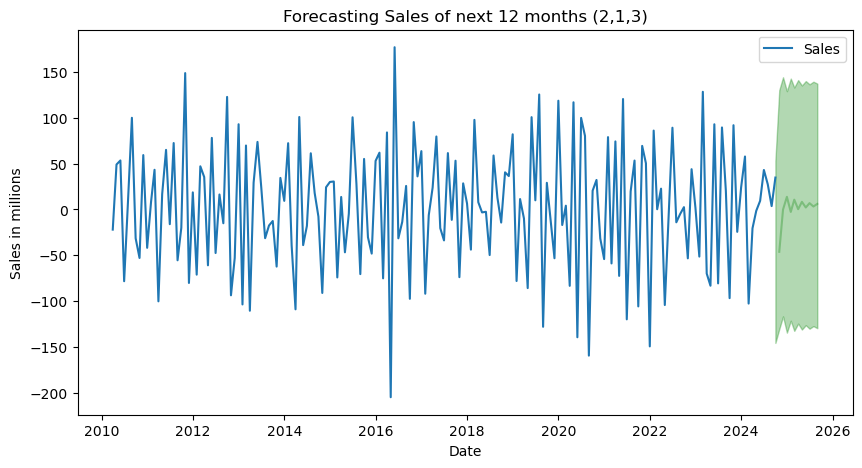

In [66]:
arima_model = sm.tsa.ARIMA(reduced_df, order=(2,1,3))
arima_result = arima_model.fit()

#pRINT THE SUMMARY OF THE FITTED MODEL
print(arima_result.summary())

#Forecast for the next 12 months
forecast_result = arima_result.get_forecast(steps=12)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

#Plotting the original data and forecast
plt.figure(figsize=(10,5))
plt.plot(reduced_df, label='Sales')
plt.plot(pd.Series(forecast,index=pd.date_range(start=reduced_df.index[-1],periods=12,freq='M')),color='green', alpha=0.3)
plt.fill_between(pd.date_range(start=reduced_df.index[-1],periods=12,freq='M'),conf_int.iloc[:,0],conf_int.iloc[:,1],color='green',alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales in millions')
plt.title('Forecasting Sales of next 12 months (2,1,3)')
plt.legend()
plt.show()